szukanie zależności pomiędzy badanymi wartościami wśród pacjentów po przeszczepie serca 
obliczanie parametrów analizy statystycznej i tworzenie histogramów dla wybranych kolumn
generowanie skoroszytu korelacji pomiędzy wybranymi parametrami
drukowanie wykresów regresji wielomianowej (do 10 stopnia wielomianu) dla parametrów, których korelacja jest mniejsza niż -0.5 lub większa niż 0.5

In [66]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Przeszukiwanie folderu: C:\Users\jmmbo\Downloads\pacjenci


In [67]:
folder_path = 'C:\\Users\\jmmbo\\Downloads\\pacjenci'
pacjenci = []

if os.path.isdir(folder_path):
    print("Przeszukiwanie folderu:", folder_path)
    znalezione_pliki = False
    for plik in os.listdir(folder_path):
        if plik.endswith('.xlsx') and not plik.startswith('~$'):
            znalezione_pliki = True
            pacjenci.append(plik)


rows = ['Pole pow. l. przeds.', 'LAESV (A-L BIP)', 'LAESV (MOD BIP)', 
      'LVCO (4D Auto LVQ)', 'LVEF (Teich)', 'LVEF (4D Auto LVQ)',
      'GLPS (4D Auto LVQ)','LVIDd','LVIDs', 'IVSd', 'Masa LVd (4D Auto LVQ)',
      'LVPWd', 'LVSV (Teich)', 'LVSV (4D Auto LVQ)', 'LVCO (MOD BIP)',
      'LVEF (Auto EF BIP)', 'LVSV (Auto EF BIP)', 'LVEDV (Auto EF BIP)',
      'LVESV (Auto EF BIP)', 'RAA (s)', 'TAPSE']

combined_data = pd.DataFrame()

for pacjent in pacjenci:
    file_path = os.path.join(folder_path, pacjent)
    file = pd.read_excel(file_path)
    for value in rows:
        filter = file["Krótka etykieta"] == value
        filtered_data = file[filter]
        filtered_data.insert(0, 'nazwa pacjenta', pacjent)
        selected_columns = ['nazwa pacjenta', 'Krótka etykieta', 'Zapisana wartość']
        filtered_data = filtered_data[selected_columns]
        combined_data = pd.concat([combined_data, filtered_data])

pivot_data = combined_data.pivot_table(index='nazwa pacjenta', columns='Krótka etykieta', values='Zapisana wartość', aggfunc='first')

Przeszukiwanie folderu: C:\Users\jmmbo\Downloads\pacjenci


In [6]:
output_file = os.path.join(folder_path, 'output', 'wybrane_dane_pacjentów.xlsx')
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    pivot_data.to_excel(writer, index=True, sheet_name='out')

In [22]:
import numpy as np
pd.options.mode.chained_assignment = None

df = pd.read_excel(output_file)
for index, pacjent in enumerate(pacjenci):
    for row in rows:
        df[row][index] = float(str(df[row][index]).split(' ')[0])

In [45]:
def licz_srednia(lista):
    suma = 0
    liczba_el = 0
    for element in lista:
        if element != np.nan:
            suma += element
            liczba_el += 1
    return suma/liczba_el

bez_odstajacych = []

for value in rows:
    values = df[f'{value}'].dropna().tolist()
    srednia = licz_srednia(values)
    odchylenie = np.std(values)
    print(f'poprzednia ilość {len(values)}')
    print(f'srednia dla {value} wynosi {srednia}, a odchylenie standardowe wynosi {odchylenie}')
    for wartosc in values:
        if wartosc < (srednia - 2*odchylenie) or wartosc > (srednia + 2*odchylenie):
            values.remove(wartosc)
    print(f'obecna ilość {len(values)}')
    if len(values) < 20:
        del values
    else:
        bez_odstajacych.append(value)

print(f'ilość wszystkich wybranych kolumn {len(rows)}, ilość kolumn spełniających warunek minimalnej ilości wartości: {len(bez_odstajacych)}')

poprzednia ilość 29
srednia dla Pole pow. l. przeds. wynosi 25.1688642581342, a odchylenie standardowe wynosi 6.827042615515194
obecna ilość 26
poprzednia ilość 36
srednia dla LAESV (A-L BIP) wynosi 92.78757090867518, a odchylenie standardowe wynosi 45.690375456650855
obecna ilość 34
poprzednia ilość 36
srednia dla LAESV (MOD BIP) wynosi 83.02721694913917, a odchylenie standardowe wynosi 36.02805284414719
obecna ilość 34
poprzednia ilość 16
srednia dla LVCO (4D Auto LVQ) wynosi 5.899897538387293, a odchylenie standardowe wynosi 1.6620478233526716
obecna ilość 15
poprzednia ilość 36
srednia dla LVEF (Teich) wynosi 62.26490083046201, a odchylenie standardowe wynosi 10.534506265172878
obecna ilość 35
poprzednia ilość 16
srednia dla LVEF (4D Auto LVQ) wynosi 54.67159396628466, a odchylenie standardowe wynosi 7.4140465774582704
obecna ilość 15
poprzednia ilość 4
srednia dla GLPS (4D Auto LVQ) wynosi -14.78723231703043, a odchylenie standardowe wynosi 4.335261502409303
obecna ilość 4
poprzed

In [33]:
df['Pole pow. l. przeds.'].mean()+2*df['Pole pow. l. przeds.'].std()

39.06463347730794

In [28]:
df2 = df
df2
df2 = df2.where(df2.iloc[:,1:] < df2.iloc[:,1:].mean()+2*df2.iloc[:,1:].std())
df2 = df2.where(df2.iloc[:,1:].mean()-2*df2.iloc[:,1:].std() < df2.iloc[:,1:])
df2

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,nazwa pacjenta,GLPS (4D Auto LVQ),IVSd,LAESV (A-L BIP),LAESV (MOD BIP),LVCO (4D Auto LVQ),LVCO (MOD BIP),LVEDV (Auto EF BIP),LVEF (4D Auto LVQ),LVEF (Auto EF BIP),...,LVIDd,LVIDs,LVPWd,LVSV (4D Auto LVQ),LVSV (Auto EF BIP),LVSV (Teich),Masa LVd (4D Auto LVQ),Pole pow. l. przeds.,RAA (s),TAPSE
0,NaN,-13.316242,0.820337,48.012516,44.913516,4.456711,4.131842,94.433899,49.079437,46.974083,...,4.210358,2.623529,0.968417,50.382445,44.359459,53.874855,117.687462,18.765409,14.988046,1.68
1,NaN,NaN,0.908217,62.94594,60.401573,4.388175,4.330988,104.335915,59.632423,59.624493,...,4.931843,2.806366,0.781091,62.041941,62.209763,84.81185,NaN,26.148517,18.163537,1.836522
2,NaN,NaN,NaN,73.051742,67.844143,4.604216,4.295102,100.50013,59.092837,58.864735,...,4.513216,3.120894,0.976275,60.490877,59.159138,54.543016,NaN,21.371938,19.186148,NaN
3,NaN,NaN,1.271071,75.167018,70.979147,NaN,4.236117,113.249123,NaN,56.433899,...,4.845587,2.904829,1.106639,NaN,63.910892,77.573079,NaN,NaN,NaN,1.893913
4,NaN,NaN,0.94,78.46,74.39,4.79,3.34,81.68,53.9,50.2,...,4.83,3.25,0.78,57.53,41.0,66.57,NaN,26.59,18.04,1.88
5,NaN,NaN,1.01,97.46,93.64,4.28,4.52,96.74,58.52,59.42,...,4.84,3.24,0.91,52.32,57.48,67.38,NaN,28.46,NaN,1.69
6,NaN,NaN,1.109307,98.872708,94.060183,NaN,NaN,NaN,49.472799,NaN,...,5.537552,3.594514,1.082329,94.440882,NaN,95.516187,NaN,NaN,NaN,1.690435
7,NaN,NaN,1.082329,89.838876,85.129573,5.97721,5.761123,116.796547,59.99338,60.254398,...,5.009082,2.918536,0.718245,73.056546,70.375061,86.023906,NaN,27.409278,18.169197,1.94087
8,NaN,NaN,1.027461,95.665425,91.162969,NaN,5.761061,106.3805,NaN,50.12556,...,4.98142,3.852762,1.145551,NaN,53.32381,53.200334,NaN,NaN,13.777353,NaN
9,NaN,NaN,1.000355,107.06531,100.021018,NaN,4.973712,100.407455,NaN,47.155689,...,4.429392,2.820011,1.055712,NaN,47.347828,59.000338,NaN,29.44406,NaN,1.46087


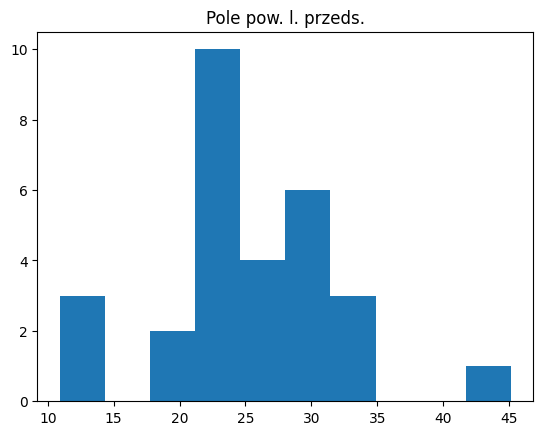

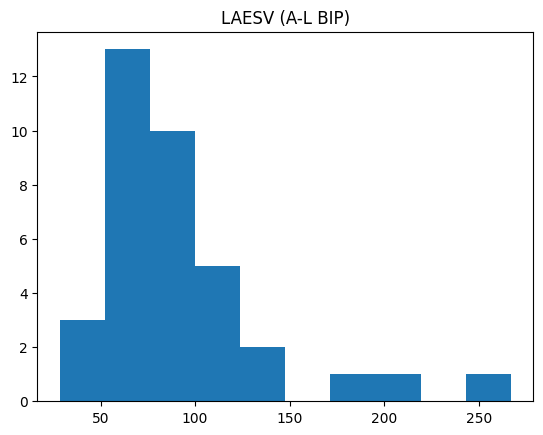

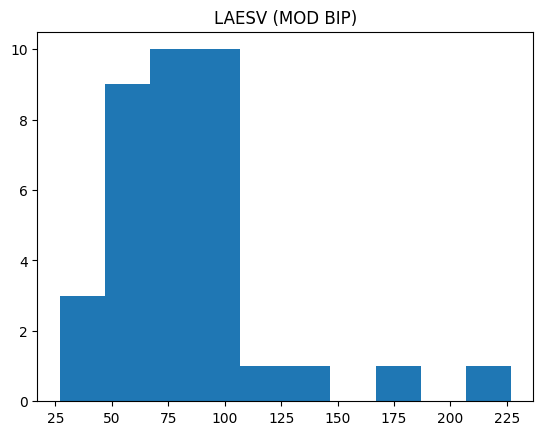

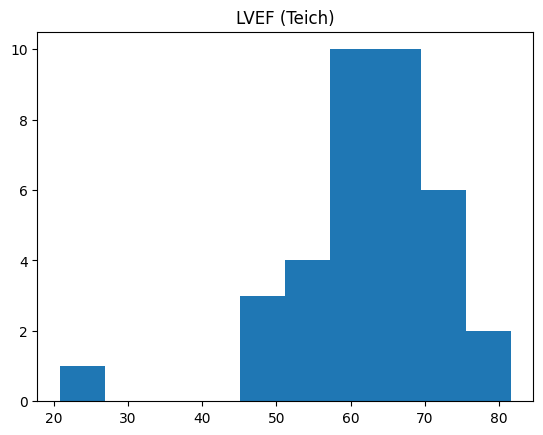

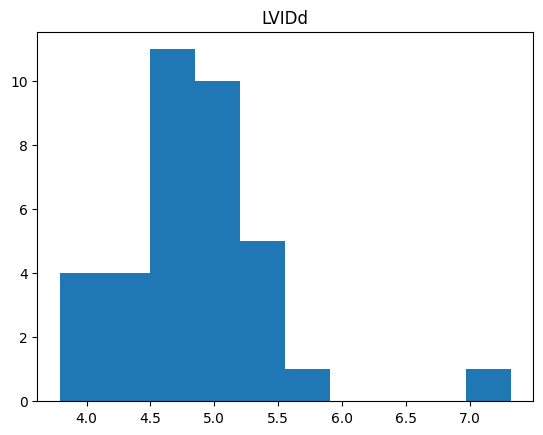

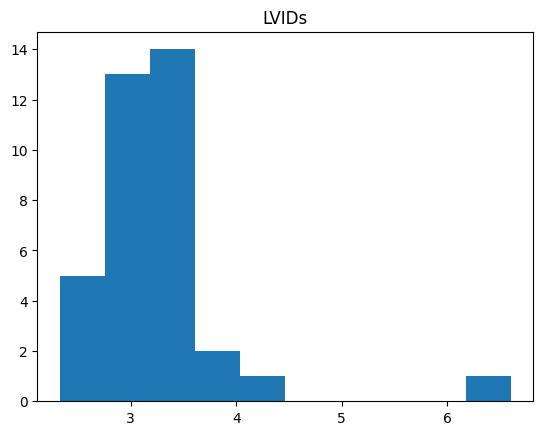

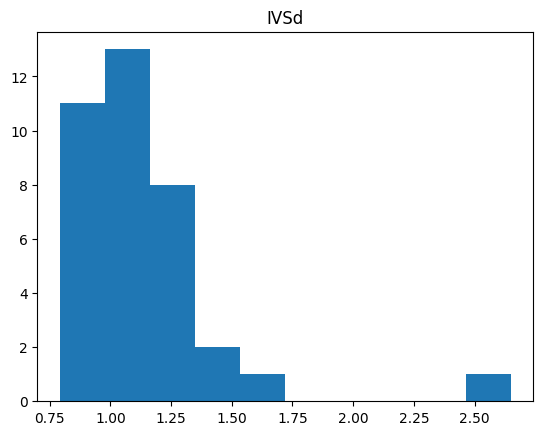

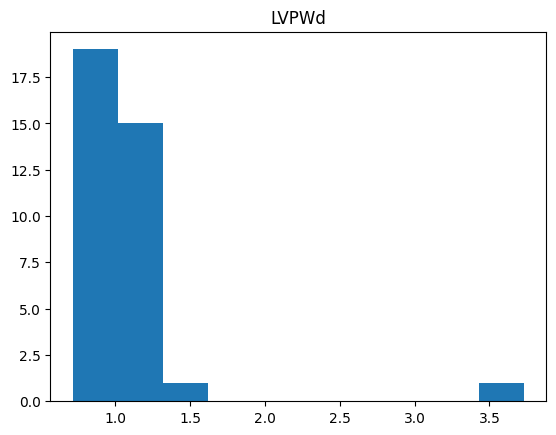

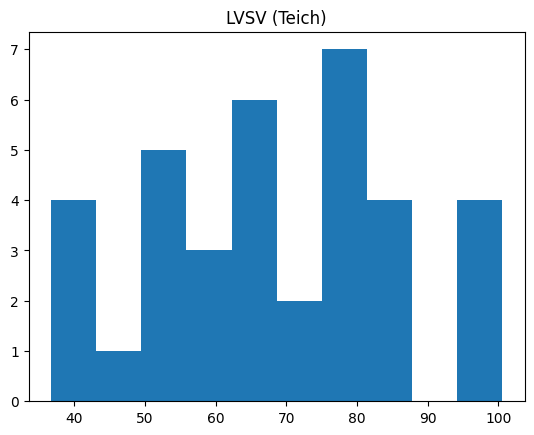

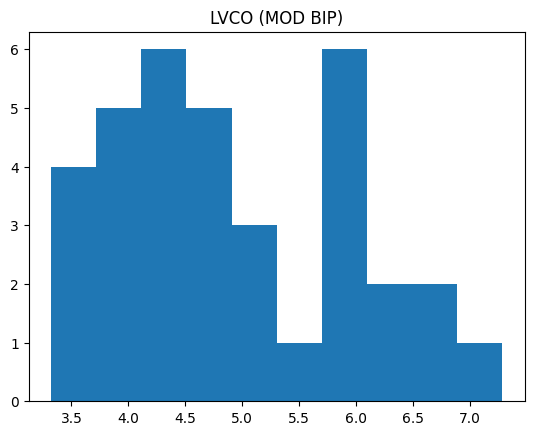

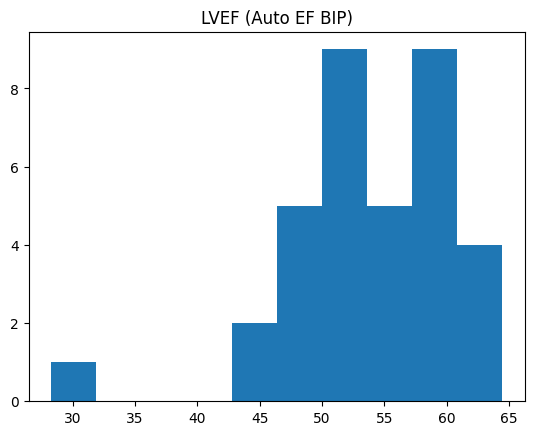

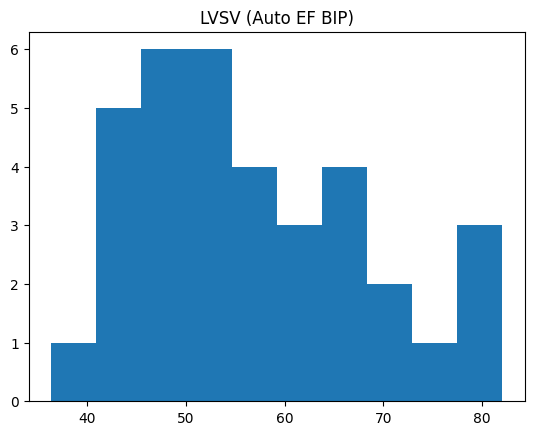

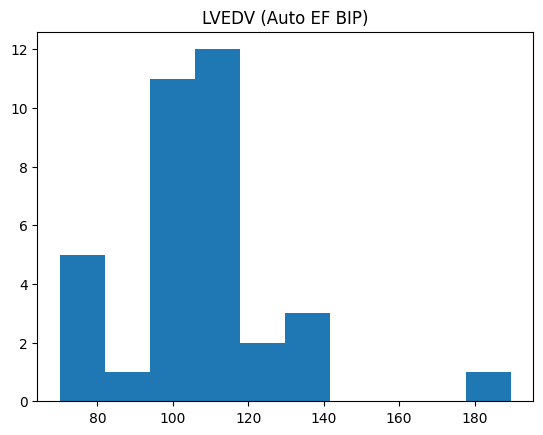

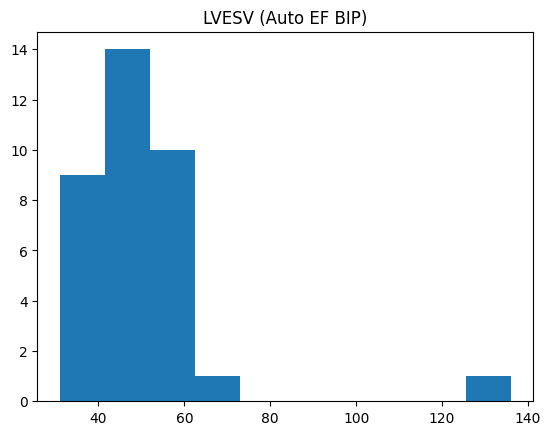

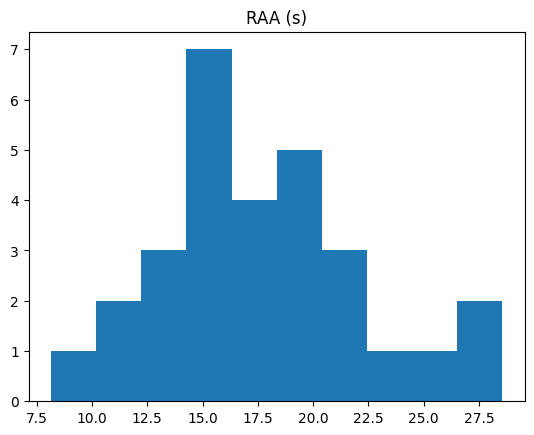

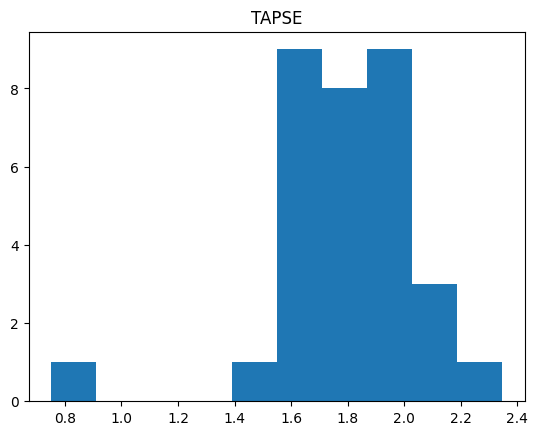

In [39]:
for value in bez_odstajacych:
    values = df[f'{value}'].dropna().tolist()
    plt.figure()
    plt.hist(values)
    plt.title(f'{value}')
    plt.show

In [48]:
new_df = df.filter(bez_odstajacych, axis=1)

for value in bez_odstajacych:
    new_df[value] = new_df[value].dropna()

print(new_df)

   Pole pow. l. przeds. LAESV (A-L BIP) LAESV (MOD BIP) LVEF (Teich)  \
0             18.765409       48.012516       44.913516    68.164141   
1             26.148517        62.94594       60.401573    74.053208   
2             21.371938       73.051742       67.844143    58.595315   
3                   NaN       75.167018       70.979147    70.574433   
4                 26.59           78.46           74.39        60.98   
5                 28.46           97.46           93.64        61.45   
6                   NaN       98.872708       94.060183     63.78406   
7             27.409278       89.838876       85.129573    72.445459   
8             11.270701       95.665425       91.162969    45.383362   
9              29.44406       107.06531      100.021018    66.237822   
10            29.229134       83.858002       79.145083    69.591778   
11                22.48           66.52           60.38        56.47   
12            17.967313       53.357463       47.814695    68.21

In [49]:
scaled_file = os.path.join(folder_path, 'output', 'skalowane_dane.xlsx')
with pd.ExcelWriter(scaled_file, engine='openpyxl') as writer:
    new_df[bez_odstajacych].to_excel(writer, index=True, sheet_name='out')

In [50]:
data = pd.read_excel(scaled_file)
data

,Unnamed: 0,Pole pow. l. przeds.,LAESV (A-L BIP),LAESV (MOD BIP),LVEF (Teich),LVIDd,LVIDs,IVSd,LVPWd,LVSV (Teich),LVCO (MOD BIP),LVEF (Auto EF BIP),LVSV (Auto EF BIP),LVEDV (Auto EF BIP),LVESV (Auto EF BIP),RAA (s),TAPSE
0,0,18.765409,48.012516,44.913516,68.164141,4.210358,2.623529,0.820337,0.968417,53.874855,4.131842,46.974083,44.359459,94.433899,50.074440,14.988046,1.680000
1,1,26.148517,62.945940,60.401573,74.053208,4.931843,2.806366,0.908217,0.781091,84.811850,4.330988,59.624493,62.209763,104.335915,42.126152,18.163537,1.836522
2,2,21.371938,73.051742,67.844143,58.595315,4.513216,3.120894,2.649397,0.976275,54.543016,4.295102,58.864735,59.159138,100.500130,41.340992,19.186148,NaN
3,3,NaN,75.167018,70.979147,70.574433,4.845587,2.904829,1.271071,1.106639,77.573079,4.236117,56.433899,63.910892,113.249123,49.338230,NaN,1.893913
4,4,26.590000,78.460000,74.390000,60.980000,4.830000,3.250000,0.940000,0.780000,66.570000,3.340000,50.200000,41.000000,81.680000,40.680000,18.040000,1.880000
5,5,28.460000,97.460000,93.640000,61.450000,4.840000,3.240000,1.010000,0.910000,67.380000,4.520000,59.420000,57.480000,96.740000,39.260000,NaN,1.690000
6,6,NaN,98.872708,94.060183,63.784060,5.537552,3.594514,1.109307,1.082329,95.516187,NaN,NaN,NaN,NaN,NaN,NaN,1.690435
7,7,27.409278,89.838876,85.129573,72.445459,5.009082,2.918536,1.082329,0.718245,86.023906,5.761123,60.254398,70.375061,116.796547,46.421490,18.169197,1.940870
8,8,11.270701,95.665425,91.162969,45.383362,4.981420,3.852762,1.027461,1.145551,53.200334,5.761061,50.125560,53.323810,106.380500,53.056670,13.777353,0.751304
9,9,29.444060,107.065310,100.021018,66.237822,4.429392,2.820011,1.000355,1.055712,59.000338,4.973712,47.155689,47.347828,100.407455,53.059628,28.540532,1.460870


In [52]:
cor_pearson = data[bez_odstajacych].corr(method='pearson')
pearson = os.path.join(folder_path, 'output', 'korelacje.xlsx')
with pd.ExcelWriter(pearson, engine='openpyxl') as writer:
    cor_pearson.to_excel(writer, index=True, sheet_name='pearson')


In [54]:
filename = r"C:\\Users\\jmmbo\\Downloads\\pacjenci\\output\\korelacje.xlsx"
cor_kendall = data[bez_odstajacych].corr(method='kendall')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_kendall.to_excel(writer, sheet_name='kendall', index=True)

In [55]:
cor_spearman = data[bez_odstajacych].corr(method='spearman')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_spearman.to_excel(writer, sheet_name="spearman", index=True)

In [57]:
korelacje = pd.read_excel(filename)

for row in bez_odstajacych:
    for index, value in enumerate(korelacje[row]):
        if -0.5 < korelacje[row][index] <= 0.5:
            korelacje[row][index] = np.nan
        else:
            pass

In [58]:
skorelowane = []
for column in korelacje.columns:
    for index, row in enumerate(korelacje['Unnamed: 0']):
        if not (korelacje[column][index] != korelacje[column][index]) and column != row and column != 'Unnamed: 0' and (row,column) not in skorelowane and (column,row) not in skorelowane:
            skorelowane.append((column,row))

In [59]:
skalowane_dane = pd.read_excel(r"C:\Users\jmmbo\Downloads\pacjenci\output\skalowane_dane.xlsx")

In [ ]:
wartosci_do_plotowania = []

for krotka in skorelowane:
    x, y = krotka

    x = skalowane_dane[x]
    y = skalowane_dane[y]

    z = pd.DataFrame(zip(x,y)).dropna()
    wartosci_do_plotowania.append(z)


for index, krotka in enumerate(skorelowane):
            wart_reshaped = np.array(wartosci_do_plotowania[index][0]).reshape(-1,1)
            features = PolynomialFeatures(degree=len(wartosci_do_plotowania[index][0]))
            WART = features.fit_transform(wart_reshaped)
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)


            linreg = LinearRegression(fit_intercept=False)
            

            for polynomial_order in range(1,11):
                training_values = linreg.fit(X_train, y_train)
                fitting_values = linreg.fit(WART[:, :polynomial_order], wartosci_do_plotowania[index][1])
                fitted_values_to_model = fitting_values.predict(x_fitting[:,:polynomial_order])
                plt.plot(x_to_fit, fitted_values_to_model, label=str(polynomial_order))

            plt.scatter(wartosci_do_plotowania[index][0], wartosci_do_plotowania[index][1])
            plt.xlabel(krotka[0])
            plt.ylabel(krotka[1])
            plt.xlim(min(wartosci_do_plotowania[index][0])-5, max(wartosci_do_plotowania[index][0])+5)
            plt.ylim(min(wartosci_do_plotowania[index][1])-5, max(wartosci_do_plotowania[index][1])+5)
            plt.legend()
            plt.show()

In [63]:
wartosci_do_plotowania = []

for krotka in skorelowane:
    x, y = krotka

    x = skalowane_dane[x]
    y = skalowane_dane[y]

    z = pd.DataFrame(zip(x,y), columns=['x', 'y']).dropna()
    wartosci_do_plotowania.append(z)


Order: 2 | RMSE = 8.340989586094658
(7, 2) (7, 1)


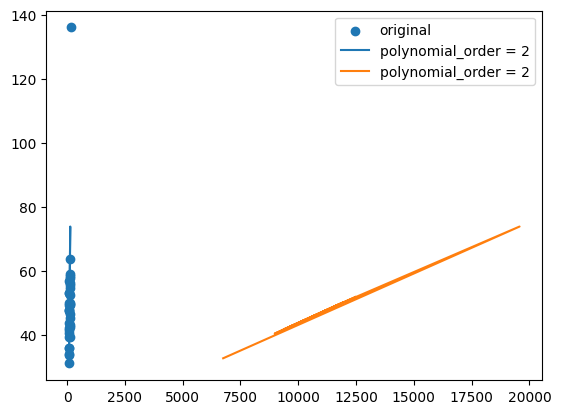

In [151]:
x, y = z['x'], z['y']
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)


plt.scatter(x,y, label='original')
#plt.scatter(x_train, y_train, label='training')
#plt.scatter(x_test, y_test, label='test')
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

#for polynomial_order in range(1, 4):
polynomial_regression_model = LinearRegression(fit_intercept=False)
polynomial_regression_model.fit(x_train, y_train)

y_predicted = polynomial_regression_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f'Order: {2} | RMSE = {rmse}')

print(x_test.shape, y_predicted.shape)

plt.plot(x_test, y_predicted, label=f'polynomial_order = {2}')

plt.legend()
plt.show()